## TMDB Movie Data Analysis Project **(PySpark Version)**

#### Import Dependencies and Env Setup

In [1]:
from pyspark.sql import SparkSession
from utilityFuncs import *
from dotenv import load_dotenv
# Initialize Session
spark = SparkSession.builder.appName("TMDBmain").getOrCreate()
#Load environment
load_dotenv()

True

#### Fetch Movies Data From TMDB API EndPoint

In [2]:
#List of requested movie IDs 
movie_ids = [
    0, 299534, 19995, 140607, 299536, 597, 135397, 420818, 24428,
    168259, 99861, 284054, 12445, 181808, 330457, 351286, 109445,
    321612, 260513
]

# ---- extracts data from movies API ----
# Function responsible for data extraction, rdd and df creation and finally saving file in parquet format to desired destination 

df = fetch_movie_data_spark(movie_ids)

Failed: 0 (Status 404)
Failed: 0 (Status 404)
Failed: 0 (Status 404)
Data saved to data/raw/moviesData_24-04-2025_21-29-35.parquet


#### Data Cleaning

In [3]:
# ---- Refines or cleans data ----

# Load extracted data
df = spark.read.parquet("data/raw/moviesData_24-04-2025*.parquet")

# Handling nested JSON structures using Spark SQL functions (`transform`, `explode`, etc.)

df = dataRefine(df)

# Display sample of Refined data

df.show(7, truncate=False)

Cleaned DataFrame has 18 rows and 22 columns.
+--------+-----------------------+---------------------------------------------------+------------+----------------------------------------+-----------------------------------+-----------------+-----------+------------+----------------------------------------------------------------------------+---------------------------------------+----------+------------+----------+-------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------

#### KPI Implementation & Analysis

In [4]:
#                                           ---- Exploratory Data Analysis ----

# This function creates the rio and profit needed for data Analysis

df = add_helper_columns(df)

#                                               ---- KPI Calculations ----

# Highest Revenue
print("\nTop 5 Highest Revenue Movies:")
rank_movies_spark(df, sort_by='revenue_musd', ascending=False).show(truncate=False)

# Highest Budget
print("\nTop 5 Highest Budget Movies:")
rank_movies_spark(df, sort_by='budget_musd', ascending=False).show(truncate=False)

# Highest Profit
print("\nTop 5 Highest Profit Movies:")
rank_movies_spark(df, sort_by='profit', ascending=False).show(truncate=False)

# Lowest Profit
print("\nTop 5 Lowest Profit Movies:")
rank_movies_spark(df, sort_by='profit', ascending=True).show(truncate=False)

# Highest ROI (only budget ≥ 10M)
print("\nTop 5 Highest ROI Movies (budget ≥ 10M):")
rank_movies_spark(df, sort_by='roi', ascending=False, min_budget_musd=10).show(truncate=False)

# Lowest ROI (only budget ≥ 10M)
print("\nTop 5 Lowest ROI Movies (budget ≥ 10M):")
rank_movies_spark(df, sort_by='roi', ascending=True, min_budget_musd=10).show(truncate=False)

# Most Voted Movies
print("\nTop 5 Most Voted Movies:")
rank_movies_spark(df, sort_by='vote_count', ascending=False).show(truncate=False)

# Highest Rated Movies (only movies ≥ 10 votes)
print("\nTop 5 Highest Rated Movies (votes ≥ 10):")
rank_movies_spark(df, sort_by='vote_average', ascending=False, min_votes=10).show(truncate=False)

# Lowest Rated Movies (only movies ≥ 10 votes)
print("\nTop 5 Lowest Rated Movies (votes ≥ 10):")
rank_movies_spark(df, sort_by='vote_average', ascending=True, min_votes=10).show(truncate=False)

# Most Popular Movies
print("\nTop 5 Most Popular Movies:")
rank_movies_spark(df, sort_by='popularity', ascending=False).show(truncate=False)

print("\n Best_scifi_action_Bruce:")
print(search_best_scifi_action_bruce(df))
print("\n search_uma_thurman_tarentino:")
print(search_uma_thurman_tarentino(df))
print("\n franchise_vs_standalone_performance:")
print(franchise_vs_standalone_performance(df))
print("\n most_successful_franchises:")
print(most_successful_franchises(df))
print("\n most_successful_directors:")
print(most_successful_directors(df))


Top 5 Highest Revenue Movies:
+----------------------------+------------+
|title                       |revenue_musd|
+----------------------------+------------+
|Avatar                      |2923.706026 |
|Avengers: Endgame           |2799.4391   |
|Titanic                     |2264.162353 |
|Star Wars: The Force Awakens|2068.223624 |
|Avengers: Infinity War      |2052.415039 |
+----------------------------+------------+


Top 5 Highest Budget Movies:
+----------------------------+-----------+
|title                       |budget_musd|
+----------------------------+-----------+
|Avengers: Age of Ultron     |365.0      |
|Avengers: Endgame           |356.0      |
|Avengers: Infinity War      |300.0      |
|The Lion King               |260.0      |
|Star Wars: The Force Awakens|245.0      |
+----------------------------+-----------+


Top 5 Highest Profit Movies:
+----------------------------+------------------+
|title                       |profit            |
+-----------------------

#### Visualization

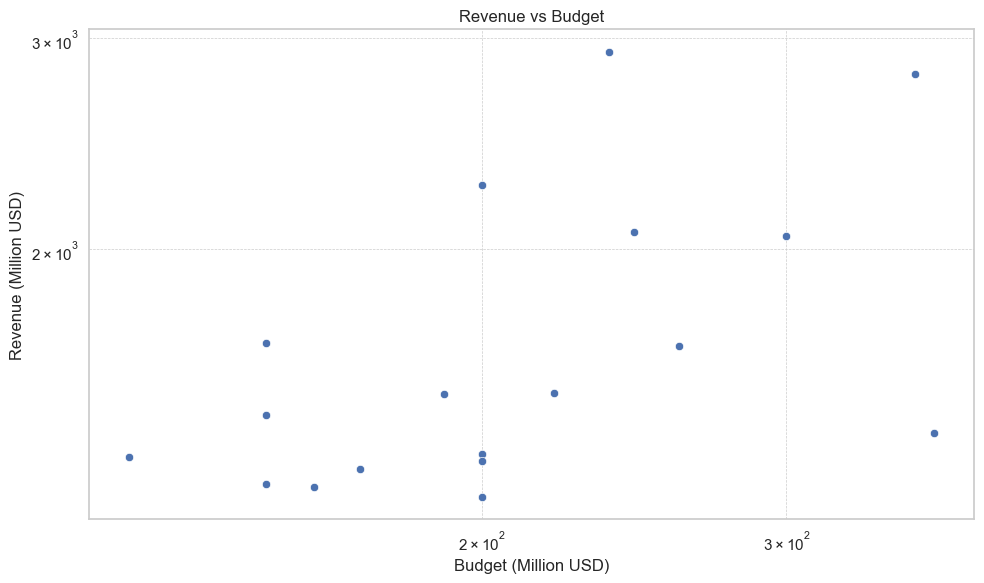

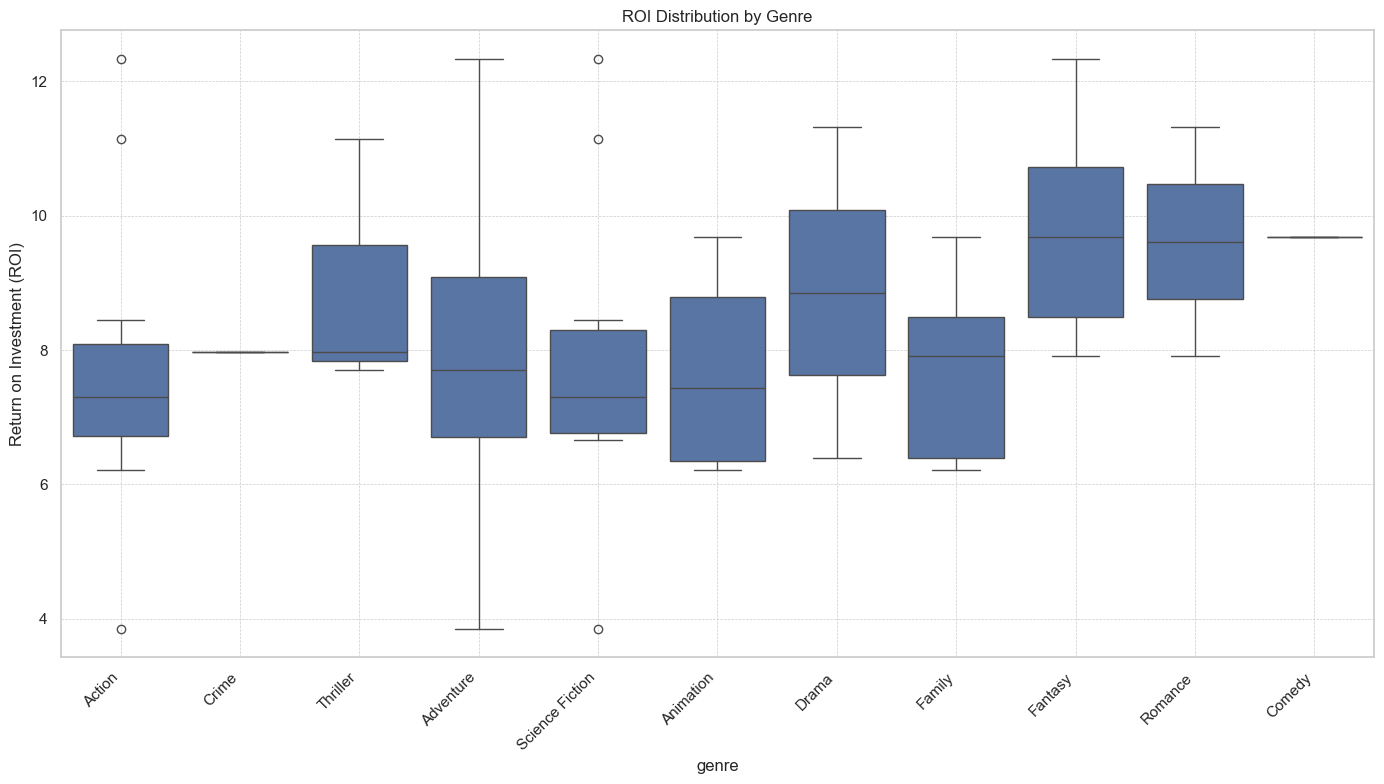

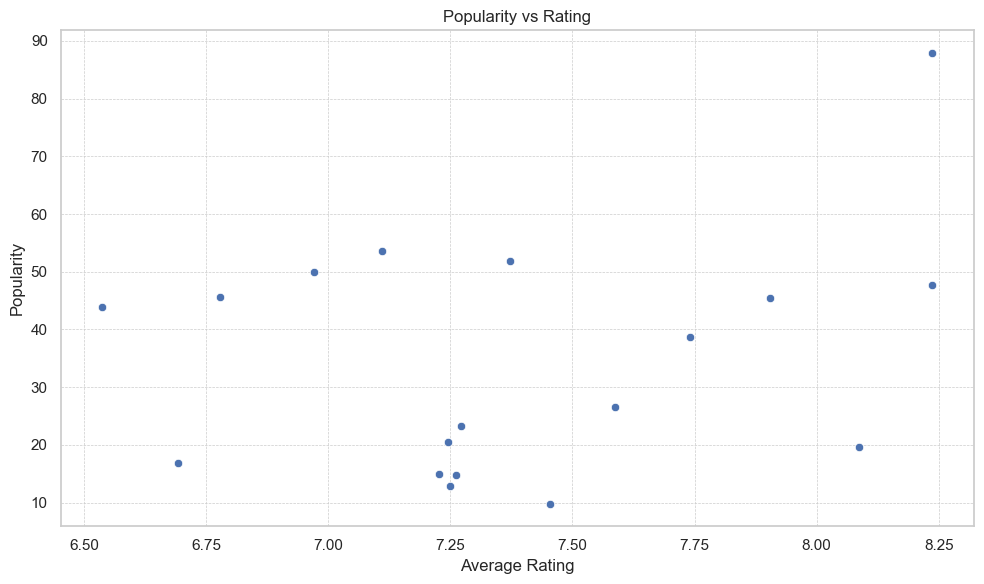

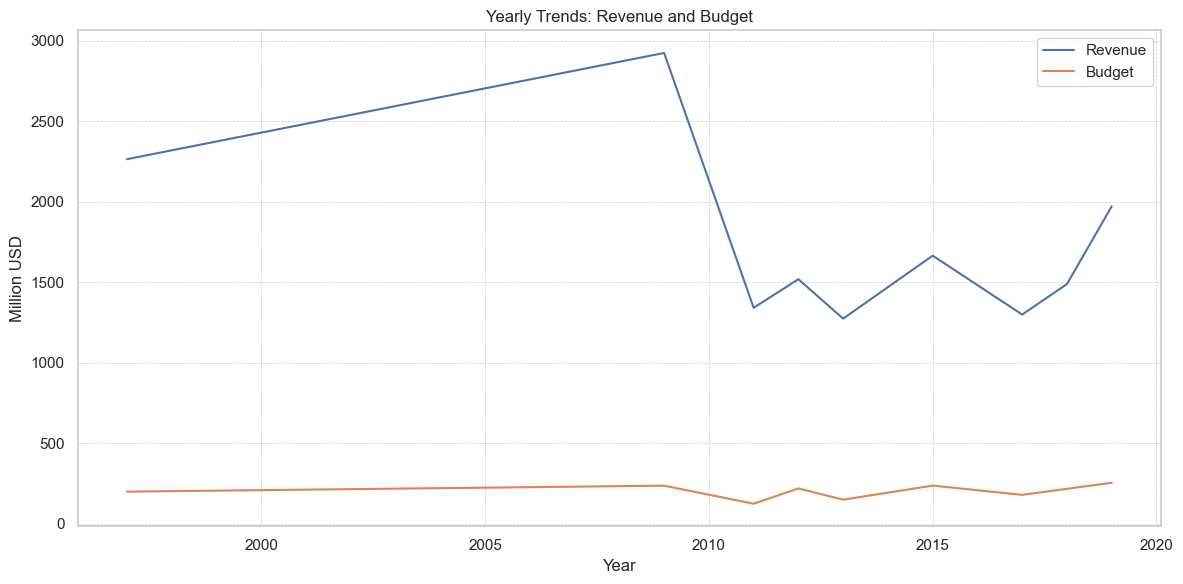

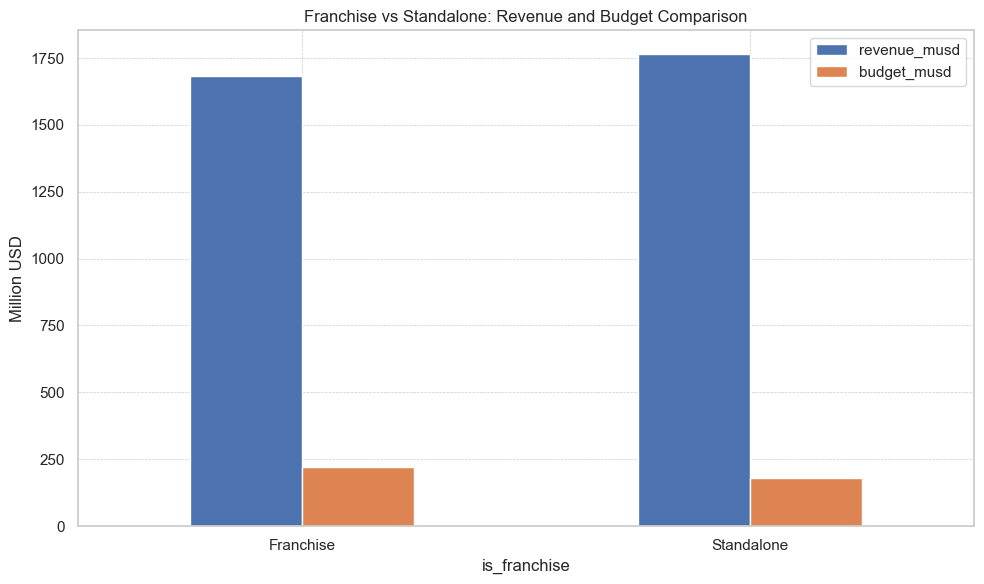

In [5]:
#                                               ---- Visualizations ----

""""
This function provides sample visuals of the following

* Revenue vs Budget (Log-Log)

* ROI Distribution by Genre

* Popularity vs Rating

* Yearly Budget & Revenue Trends

* Franchise vs Standalone Comparisons """


visualize_movies(df)